In [18]:
import logging
import matplotlib.pyplot as plt
from pyscf import gto, scf
import numpy as np

In [19]:
def f_score(S, final, initial) -> float:
    Da_guess, Db_guess = initial, initial
    Da_ref, Db_ref = final, final

    Q = lambda P_guess, P_ref: np.sum(P_guess * (S @ P_ref @ S))
    N = lambda P_ref: np.sum(P_ref * S)

    numerator = Q(Da_guess, Da_ref) + Q(Db_guess, Db_ref)
    denominator = N(Da_ref) + N(Db_ref)

    return numerator / denominator

In [20]:
# Try turning symmetry on and off
mol = gto.M(
    atom="geometries/ch.xyz",
    basis="pcseg-0",
    spin=1,
    symmetry=False,
)

In [21]:
mf = scf.UHF(mol).run()

init_dm = mf.get_init_guess(key="hcore")
S = mf.get_ovlp()

# Run SCF
# mf.kernel()
# Run stability analysis for the SCF wave function
mo1, _, stable, _ = mf.stability(verbose=logging.INFO, return_status=True)
while not stable:
    dm1 = mf.make_rdm1(mo1, mf.mo_occ)
    mf = mf.run(dm1)
    mo1, _, stable, _ = mf.stability(verbose=logging.INFO, return_status=True)

conv_dm = mf.make_rdm1()
if mol.spin == 0:
    conv_dm /= 2
    init_dm /= 2

converged SCF energy = -38.1618918855385  <S^2> = 0.75290898  2S+1 = 2.0029069
tol 0.0001  toloose 0.01
max_cycle 50  max_space 20  max_memory 4000  incore True
davidson 0 1  |r|=  1.5  e= [1.09567011]  max|de|=  1.1  lindep= 0.978
Old state -> New state
    0     ->     1 
davidson 1 2  |r|= 1.52  e= [0.27949306 1.14687766]  max|de|= 0.279  lindep= 0.884
Old state -> New state
    1     ->     0 
    0     ->     1 
    1     ->     2 
davidson 2 4  |r|= 1.15  e= [0.22635788 0.25861746 1.7892375 ]  max|de|= 1.79  lindep= 0.91
davidson 3 7  |r|= 1.14  e= [0.0320665  0.25182127 0.37121027]  max|de|= 0.371  lindep= 0.868
Old state -> New state
    2     ->     1 
    1     ->     2 
davidson 4 10  |r|= 0.821  e= [-0.00048169  0.04599483  0.25402418]  max|de|= -0.325  lindep= 0.609
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 5 13  |r|= 0.0908  e= [-6.39183033e-02  1.40826745e-04  2.53312327e-01]  max|de|= -0.11  lindep= 0.889
root 2 converged  |r|= 0.0076  e= 0

In [22]:
mf2 = scf.UHF(mol).run()
mo2, _, stable, _ = mf2.stability(verbose=logging.NOTSET, return_status=True)
while not stable:
    mf = mf2.run(mf2.make_rdm1(mo2, mf2.mo_occ))
    mo2, _, stable, _ = mf2.stability(verbose=logging.NOTSET, return_status=True)
conv_dm2 = mf2.make_rdm1()

converged SCF energy = -38.1618918855385  <S^2> = 0.75290898  2S+1 = 2.0029069
converged SCF energy = -38.1647551045053  <S^2> = 1.0693538  2S+1 = 2.2972625


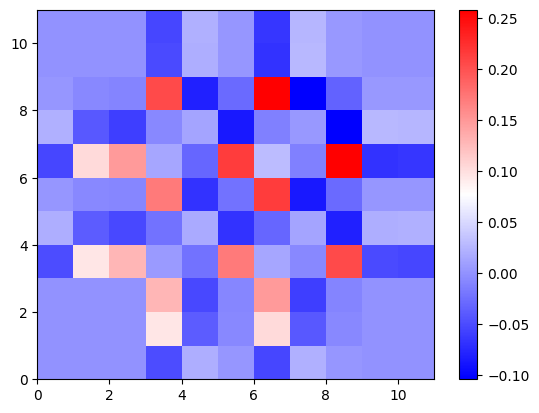

In [23]:
fig, axes = plt.subplots(ncols=1)

p = axes.pcolormesh(conv_dm2[0] - conv_dm[0], cmap="bwr")
plt.colorbar(p)

In [24]:
# print(f_score(S, conv_dm[0], init_dm[0], conv_dm[1], init_dm[1]))
# print(f_score(S, conv_dm2[0], init_dm[0], conv_dm2[1], init_dm[1]))